In [1]:
import eli5
import numpy as np
import pandas as pd
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
#from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

In [2]:
df = pd.read_excel('data_diseases.xlsx')
x = df.iloc[:,0:465]
y = df.iloc[:,465:]

In [5]:
df['label']

0       0
1       0
2       0
3       0
4       0
       ..
2804    1
2805    1
2806    1
2807    1
2808    1
Name: label, Length: 2809, dtype: int64

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

<ipython-input-7-b23d620e41e1>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


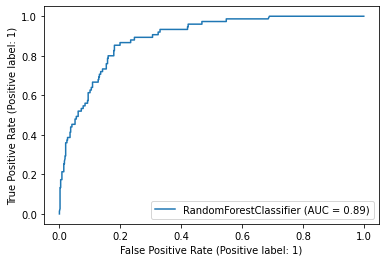

In [7]:
# meke ROC 
import matplotlib.pyplot as plt
from sklearn import metrics, model_selection

model = RandomForestClassifier(n_estimators=2000, n_jobs=-1, max_features="sqrt", max_depth=100, bootstrap=True, min_samples_split=5, min_samples_leaf=1)
model.fit(x_train, y_train)

metrics.plot_roc_curve(model, x_test, y_test)
plt.show()

In [9]:
temp_model = []
akurasi = []
recall = []
precision = []

Fold 1 :


<ipython-input-10-c4a8bfbdcb36>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Accuracy: 88.26 %
[[234   7]
 [ 26  14]]
Akurasi
0.8825622775800712
Recall
0.8825622775800712
Precision
0.866785290628707



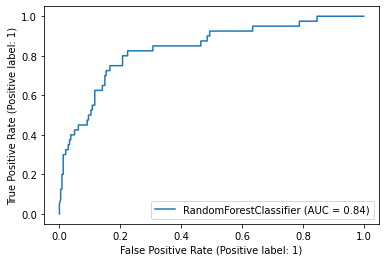

Fold 2 :


<ipython-input-10-c4a8bfbdcb36>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Accuracy: 90.03999999999999 %
[[238   3]
 [ 25  15]]
Akurasi
0.900355871886121
Recall
0.900355871886121
Precision
0.8947494237942528



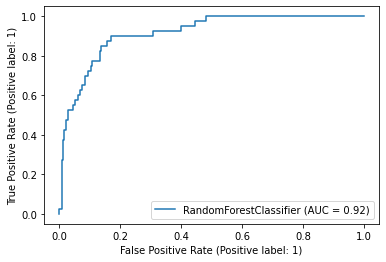

Fold 3 :


<ipython-input-10-c4a8bfbdcb36>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Accuracy: 87.9 %
[[236   5]
 [ 29  11]]
Akurasi
0.8790035587188612
Recall
0.8790035587188612
Precision
0.8616598401933794



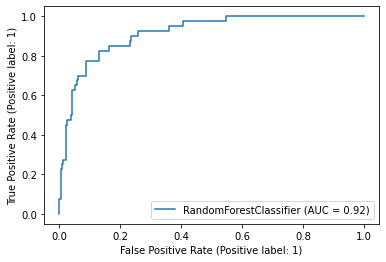

Fold 4 :


<ipython-input-10-c4a8bfbdcb36>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Accuracy: 88.26 %
[[239   2]
 [ 31   9]]
Akurasi
0.8825622775800712
Recall
0.8825622775800712
Precision
0.875647339348407



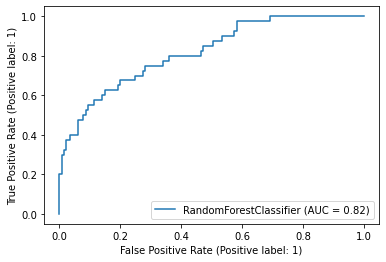

Fold 5 :


<ipython-input-10-c4a8bfbdcb36>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Accuracy: 90.75 %
[[237   4]
 [ 22  18]]
Akurasi
0.9074733096085409
Recall
0.9074733096085409
Precision
0.9012677233317802



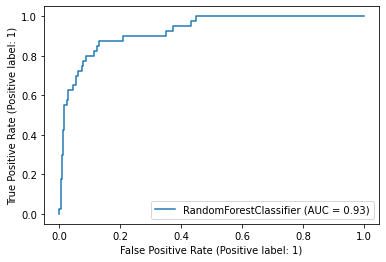

Fold 6 :


<ipython-input-10-c4a8bfbdcb36>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Accuracy: 89.32 %
[[238   3]
 [ 27  13]]
Akurasi
0.8932384341637011
Recall
0.8932384341637011
Precision
0.885926274088498



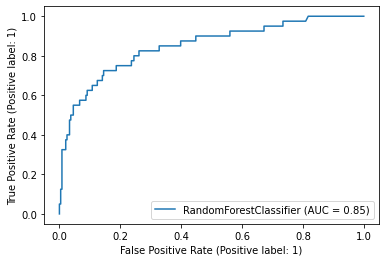

Fold 7 :


<ipython-input-10-c4a8bfbdcb36>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Accuracy: 87.9 %
[[234   7]
 [ 27  13]]
Akurasi
0.8790035587188612
Recall
0.8790035587188612
Precision
0.8614553932997915



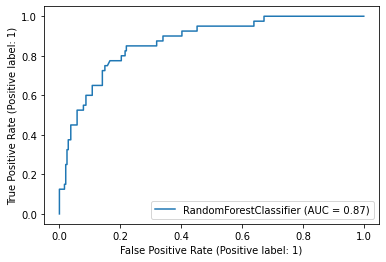

Fold 8 :


<ipython-input-10-c4a8bfbdcb36>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Accuracy: 87.53999999999999 %
[[234   7]
 [ 28  12]]
Akurasi
0.8754448398576512
Recall
0.8754448398576512
Precision
0.8558983370245451



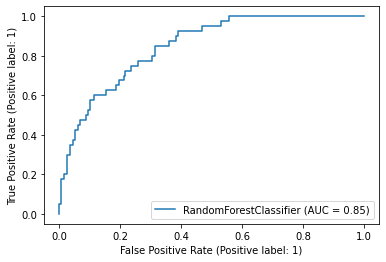

Fold 9 :


<ipython-input-10-c4a8bfbdcb36>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Accuracy: 88.26 %
[[234   7]
 [ 26  14]]
Akurasi
0.8825622775800712
Recall
0.8825622775800712
Precision
0.866785290628707



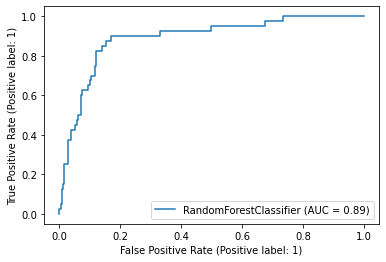

Fold 10 :


<ipython-input-10-c4a8bfbdcb36>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Accuracy: 89.64 %
[[236   5]
 [ 24  15]]
Akurasi
0.8964285714285715
Recall
0.8964285714285715
Precision
0.885728021978022



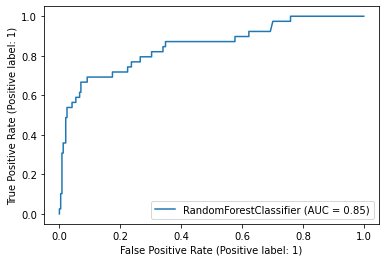

In [10]:
# random forest test set
from sklearn.model_selection import RepeatedStratifiedKFold
seed = 7
kf = RepeatedStratifiedKFold(n_splits=10, random_state=seed, n_repeats=1)
val_acc_cv = []
j = 0
for train_index, test_index in kf.split(x,y):
    j+=1
    print(f"Fold {j} :")
    X_train,X_test = x.iloc[train_index],x.iloc[test_index]
    y_train,y_test = y.iloc[train_index],y.iloc[test_index]
    
    # Instantiate model
    model = RandomForestClassifier(n_estimators=2000, n_jobs=-1, max_features="sqrt", max_depth=100, bootstrap=True, min_samples_split=5, min_samples_leaf=1)
    model.fit(X_train, y_train)
    
    temp_model.append(model)
    #Import scikit-learn metrics module for accuracy calculation
    val_acc_cv.append(round(model.score(X_test, y_test), 4)*100)
    print('Accuracy:',round(model.score(X_test, y_test), 4)*100, '%')
    
    predict = model.predict(X_test)
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import precision_score
    acc_score = accuracy_score(y_test,predict)
    recall_score = recall_score(y_test,predict, average = 'weighted')
    precision_score = precision_score(y_test,predict, average = 'weighted')
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, predict)
    print(cm)
    print("Akurasi")
    print(acc_score)
    print("Recall")
    print(recall_score)
    print("Precision") 
    print(precision_score)
    print("")
    metrics.plot_roc_curve(model, X_test, y_test)
    plt.show()
    akurasi.append(acc_score)
    recall.append(recall_score)
    precision.append(precision_score)